In [1]:
import os
import sys

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
data_dir = os.path.join(project_dir, 'data')
log_dir = os.path.join(project_dir, 'log')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)
import matplotlib.pyplot as plt
import numpy as np

import mech.full_DPSGD as DPSGDModule
from analysis.tradeoff_Gaussian import Gaussian_curve

In [2]:
model_name = 'convnet_balanced'
database_size = 1000
epochs = 25
internal_result_path = "/home/snek/martind/fdp/revision/results_yu"

data_args = {
    "method": "default",
    "data_dir": data_dir,
    "internal_result_path": os.path.join(internal_result_path, 'train')
}

args = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_KLDivLoss")
args1 = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_logit")
args2 = DPSGDModule.generate_params(data_args=data_args, log_dir=log_dir, model_name=model_name, database_size=database_size, epochs=epochs, auditing_approach="1d_cross_entropy")
# --- KLDivLoss Estimator ---
estimator_KL = DPSGDModule.DPSGD_PTLREstimator(args)
output_KL = estimator_KL.build(eta_max=15)
alpha_KLDivLoss = output_KL["alpha"]
beta_KLDivLoss = output_KL["beta"]
mu_KLDivLoss = output_KL["mu"]

# --- Logit Estimator ---
estimator_logit = DPSGDModule.DPSGD_PTLREstimator(args1)
output_logit = estimator_logit.build(eta_max=15)
alpha_logit = output_logit["alpha"]
beta_logit = output_logit["beta"]
mu_logit = output_logit["mu"]

# --- Cross Entropy Estimator ---
estimator_ce = DPSGDModule.DPSGD_PTLREstimator(args2)
output_ce = estimator_ce.build(eta_max=15)
alpha_cross_entropy = output_ce["alpha"]
beta_cross_entropy = output_ce["beta"]
mu_cross_entropy = output_ce["mu"]


05/22/2025 13:23:37:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=25, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:23:37:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_25/samples_folder. Skipping generation.
05/22/2025 13:23:53:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=25, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:23:53:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_25/samples_folder. Skipping generation.
05/22/2025 13:24:10:INFO:Initialized convnet_balanced_DPSGDSampler with parameters: batch_size=512, epochs=25, lr=0.10, sigma=1.00, max_grad_norm=1.00, device=cpu
05/22/2025 13:24:10:INFO:Found 1000 samples in /home/snek/martind/fdp/revision/results_yu/train/convnet_balanced_1000_25/samples_folder. Skipping generation.


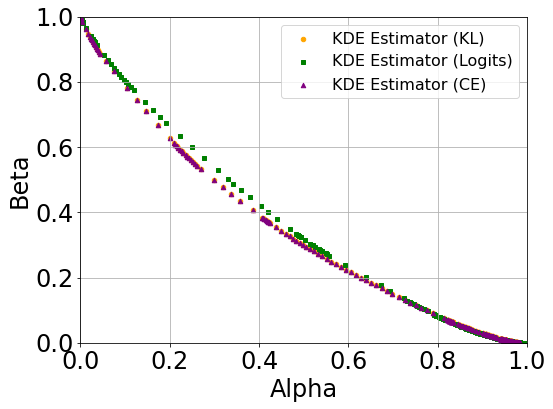

In [4]:
file_name = os.path.join(fig_dir, f"estimation_{model_name}_{database_size}.png")
plt.figure(figsize=(8, 6))

# Scatter plots for each estimator
plt.scatter(alpha_KLDivLoss, beta_KLDivLoss, color="orange", s=20, marker="o", label="KDE Estimator (KL)")
plt.scatter(alpha_logit, beta_logit, color="green", s=20, marker="s", label="KDE Estimator (Logits)")
plt.scatter(alpha_cross_entropy, beta_cross_entropy, color="purple", s=20, marker="^", label="KDE Estimator (CE)")

# Gaussian curve (based on mu from KLDivLoss, or update to use others if needed)
#alpha_values = np.linspace(0, 1, 1000)
#plt.plot(alpha_values, Gaussian_curve(alpha_values, mean_difference=mu_KLDivLoss), 
        # color="deepskyblue", linewidth=1.5, label=f"Gaussian Curve (mu={mu_KLDivLoss:.2f})")

# Plot settings
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha", fontsize=24)
plt.ylabel("Beta", fontsize=24)
plt.legend(fontsize=16)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# Save and show
plt.savefig(file_name, bbox_inches='tight', dpi=300)
plt.show()
